In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
#import LA environmental justice scores 
df = pd.read_csv(
'Data/EJSM_Scores/EJSM_Scores (1).csv' ,
dtype={
    'Tract_1':str
})

In [3]:
#add number zero leading the FIPS code for merging the data with the census tract data
df['Tract_1'] = df['Tract_1'].str.zfill(11)
df.head()

OBJECTID      Tract_1  CIscore  HazScore  HealthScore  SVscore  CCVscore  \
0         1  06037920336       10         3            1        4         2   
1         2  06037920044        4         1            1        1         1   
2         3  06037573003       13         5            3        3         2   
3         4  06037571704       13         3            2        4         4   
4         5  06037570403       17         5            3        5         4   

    Shape__Area  Shape__Length  
0  2.438560e+06    8124.373091  
1  1.470811e+06    5545.298452  
2  6.528168e+05    3310.743793  
3  6.994011e+05    4113.477175  
4  8.317839e+05    3887.000394

In [4]:
#import 2012 census data
tracts=gpd.read_file('Data/CensusData2012/census-tracts-2012.geojson')
print(tracts)

                     kind  external_id         name  \
0     Census Tract (2012)  06037101110  06037101110   
1     Census Tract (2012)  06037101122  06037101122   
2     Census Tract (2012)  06037101210  06037101210   
3     Census Tract (2012)  06037101220  06037101220   
4     Census Tract (2012)  06037101300  06037101300   
...                   ...          ...          ...   
2341  Census Tract (2012)  06037980031  06037980031   
2342  Census Tract (2012)  06037980033  06037980033   
2343  Census Tract (2012)  06037990100  06037990100   
2344  Census Tract (2012)  06037990200  06037990200   
2345  Census Tract (2012)  06037990300  06037990300   

                               slug                                    set  \
0     06037101110-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
1     06037101122-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
2     06037101210-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
3     06037101220-census-tr

In [5]:
#list column names
list(tracts)

['kind',
 'external_id',
 'name',
 'slug',
 'set',
 'metadata',
 'resource_uri',
 'geometry']

In [6]:
#drop columns
columns_to_drop = ['set','kind','resource_uri','metadata']

In [7]:
#read columns 
tracts.head()

kind  external_id         name  \
0  Census Tract (2012)  06037101110  06037101110   
1  Census Tract (2012)  06037101122  06037101122   
2  Census Tract (2012)  06037101210  06037101210   
3  Census Tract (2012)  06037101220  06037101220   
4  Census Tract (2012)  06037101300  06037101300   

                            slug                                    set  \
0  06037101110-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
1  06037101122-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
2  06037101210-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
3  06037101220-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
4  06037101300-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   

                                            metadata  \
0  {'INTPTLAT': '+34.2594737', 'NAME': '1011.10',...   
1  {'INTPTLAT': '+34.2677213', 'NAME': '1011.22',...   
2  {'INTPTLAT': '+34.2529724', 'NAME': '1012.10',...   
3  {'INTPTLAT': '+34.2516085', 'NAME': '1012.20',...   
4  {'INTPTLAT': '+34.2487732', 'NAME': '1013', 'I...   

                                   resource_uri  \
0  /1.0/boundary/06037101110-census-tract-2012/   
1  /1.0/boundary/06037101122-census-tract-2012/   
2  /1.0/boundary/06037101210-census-tract-2012/   
3  /1.0/boundary/06037101220-census-tract-2012/   
4  /1.0/boundary/06037101300-census-tract-2012/   

                                            geometry  
0  MULTIPOLYGON (((-118.30229 34.25870, -118.3007...  
1  MULTIPOLYGON (((-118.30333 34.27354, -118.3031...  
2  MULTIPOLYGON (((-118.29945 34.25598, -118.2859...  
3  MULTIPOLYGON (((-118.28592 34.24896, -118.2859...  
4  MULTIPOLYGON (((-118.27247 34.23253, -118.2719...

In [8]:
#drop columns from tracts data
tracts = tracts.drop(columns_to_drop,axis=1)

In [9]:
tracts.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   external_id  2346 non-null   object  
 1   name         2346 non-null   object  
 2   slug         2346 non-null   object  
 3   geometry     2346 non-null   geometry
dtypes: geometry(1), object(3)
memory usage: 73.4+ KB


In [10]:
#isolate the FIPS code and geometry column to match with the EJSM data
tracts = tracts[['name','geometry']]
tracts.head()

name                                           geometry
0  06037101110  MULTIPOLYGON (((-118.30229 34.25870, -118.3007...
1  06037101122  MULTIPOLYGON (((-118.30333 34.27354, -118.3031...
2  06037101210  MULTIPOLYGON (((-118.29945 34.25598, -118.2859...
3  06037101220  MULTIPOLYGON (((-118.28592 34.24896, -118.2859...
4  06037101300  MULTIPOLYGON (((-118.27247 34.23253, -118.2719...

In [11]:
#show columns
tracts.columns = ['FIPS','geometry']
tracts.head()

FIPS                                           geometry
0  06037101110  MULTIPOLYGON (((-118.30229 34.25870, -118.3007...
1  06037101122  MULTIPOLYGON (((-118.30333 34.27354, -118.3031...
2  06037101210  MULTIPOLYGON (((-118.29945 34.25598, -118.2859...
3  06037101220  MULTIPOLYGON (((-118.28592 34.24896, -118.2859...
4  06037101300  MULTIPOLYGON (((-118.27247 34.23253, -118.2719...

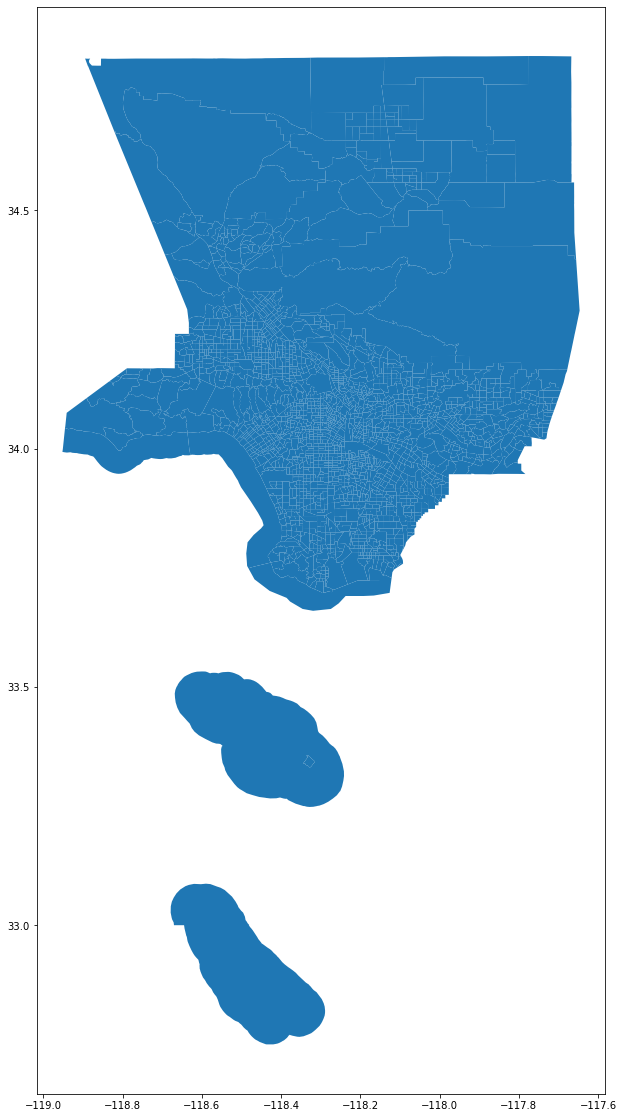

In [12]:
#plot tracts
tracts.plot(figsize=(24,20))

In [13]:
#list EJSM df with new FIPS code
list(df)

['OBJECTID',
 'Tract_1',
 'CIscore',
 'HazScore',
 'HealthScore',
 'SVscore',
 'CCVscore',
 'Shape__Area',
 'Shape__Length']

In [14]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       2343 non-null   int64  
 1   Tract_1        2343 non-null   object 
 2   CIscore        2343 non-null   int64  
 3   HazScore       2343 non-null   int64  
 4   HealthScore    2343 non-null   int64  
 5   SVscore        2343 non-null   int64  
 6   CCVscore       2343 non-null   int64  
 7   Shape__Area    2343 non-null   float64
 8   Shape__Length  2343 non-null   float64
dtypes: float64(2), int64(6), object(1)
memory usage: 164.9+ KB


In [15]:
#rename object Tract_1 to FIPS to match census tract data
df.columns = ['OBJECTID',
 'FIPS',
 'CIscore',
 'HazScore',
 'HealthScore',
 'SVscore',
 'CCVscore',
 'Shape__Area',
 'Shape__Length']
df.head()

OBJECTID         FIPS  CIscore  HazScore  HealthScore  SVscore  CCVscore  \
0         1  06037920336       10         3            1        4         2   
1         2  06037920044        4         1            1        1         1   
2         3  06037573003       13         5            3        3         2   
3         4  06037571704       13         3            2        4         4   
4         5  06037570403       17         5            3        5         4   

    Shape__Area  Shape__Length  
0  2.438560e+06    8124.373091  
1  1.470811e+06    5545.298452  
2  6.528168e+05    3310.743793  
3  6.994011e+05    4113.477175  
4  8.317839e+05    3887.000394

In [16]:
#merge data on the same object FIPS
tracts_ejsm=tracts.merge(df,on="FIPS")

In [17]:
#show merge with census data (only population)
tracts_ejsm.head()

FIPS                                           geometry  OBJECTID  \
0  06037101110  MULTIPOLYGON (((-118.30229 34.25870, -118.3007...      1464   
1  06037101122  MULTIPOLYGON (((-118.30333 34.27354, -118.3031...       672   
2  06037101210  MULTIPOLYGON (((-118.29945 34.25598, -118.2859...      1446   
3  06037101220  MULTIPOLYGON (((-118.28592 34.24896, -118.2859...      1703   
4  06037101300  MULTIPOLYGON (((-118.27247 34.23253, -118.2719...      1579   

   CIscore  HazScore  HealthScore  SVscore  CCVscore   Shape__Area  \
0       10         3            1        3         3  1.677572e+06   
1        4         1            1        1         1  3.891711e+06   
2       14         4            1        4         5  9.516179e+05   
3       12         3            1        4         4  1.026836e+06   
4        5         1            1        1         2  3.781233e+06   

   Shape__Length  
0    5561.283410  
1   11660.850429  
2    4451.778658  
3    4673.869604  
4   10813.184183

In [18]:
#describe stats by cumulative impact score
tracts_ejsm['CIscore'].describe()

count    2342.000000
mean       12.007259
std         4.352322
min         0.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        20.000000
Name: CIscore, dtype: float64

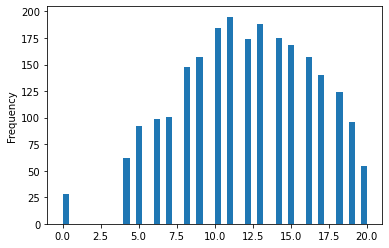

In [19]:
#plot histogram for cumulative impact score
tracts_ejsm['CIscore'].plot.hist(bins=50)

In [20]:
#describe stats by proximity to hazard score
tracts_ejsm['HazScore'].describe()

count    2342.000000
mean        2.976943
std         1.434123
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: HazScore, dtype: float64

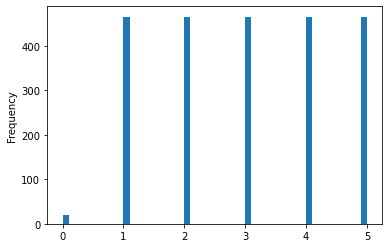

In [21]:
#plot histogram for proximity to hazard score
tracts_ejsm['HazScore'].plot.hist(bins=50)

In [22]:
#describe stats by proximity to hazard score
tracts_ejsm['SVscore'].describe()

count    2342.000000
mean        2.948335
std         1.434122
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: SVscore, dtype: float64

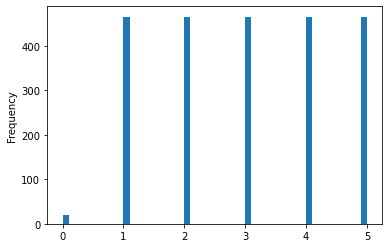

In [23]:
#plot histogram for proximity to hazard score
tracts_ejsm['HazScore'].plot.hist(bins=50)

In [24]:
#new object to show the sorted data-no difference? perhaps delete?
tracts_ejsm_sorted = tracts_ejsm.sort_values(by='CIscore',ascending = False)

In [25]:
#sorted data has no variation
tracts_ejsm_sorted[['FIPS','CIscore','HazScore','SVscore']].head(10)

FIPS  CIscore  HazScore  SVscore
1325  06037433501       20         5        5
1530  06037530301       20         5        5
594   06037211922       20         5        5
532   06037206032       20         5        5
533   06037206050       20         5        5
660   06037219300       20         5        5
581   06037211310       20         5        5
672   06037221302       20         5        5
719   06037228900       20         5        5
1637  06037535605       20         5        5

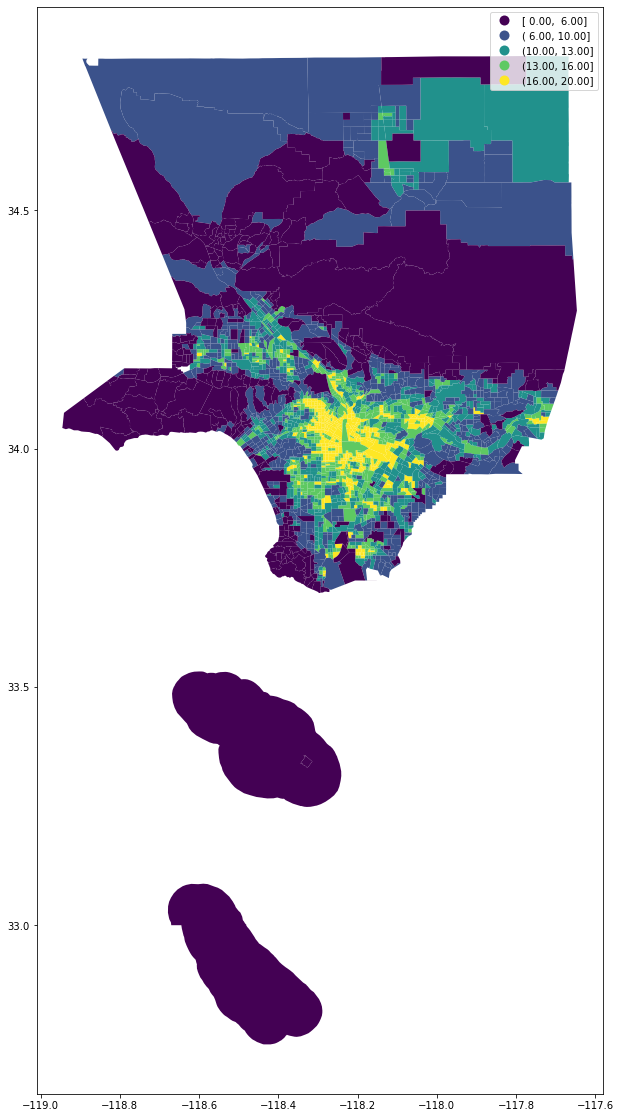

In [26]:
#plot shows the data with natural breaks
tracts_ejsm_sorted.plot(figsize=(24,20),
                 column='CIscore',
                 legend=True, 
                 scheme='NaturalBreaks')

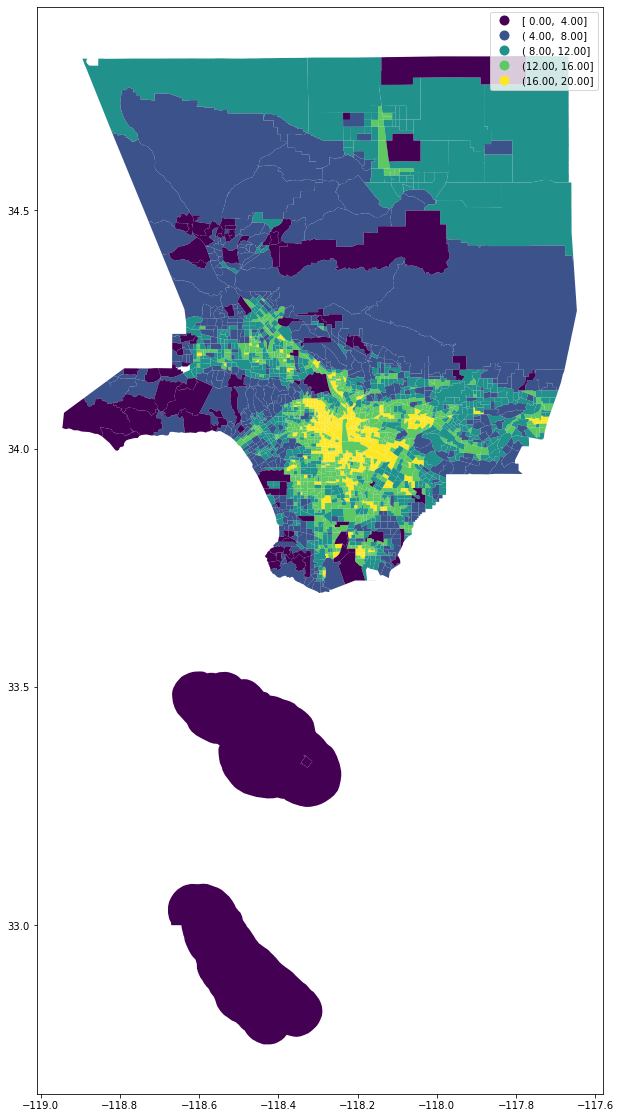

In [27]:
#equal intervalfor Cumulative Impact Score -by standard deviation 
tracts_ejsm_sorted.plot(figsize=(24,20),
                 column='CIscore',
                 legend=True, 
                 scheme='equal_interval')

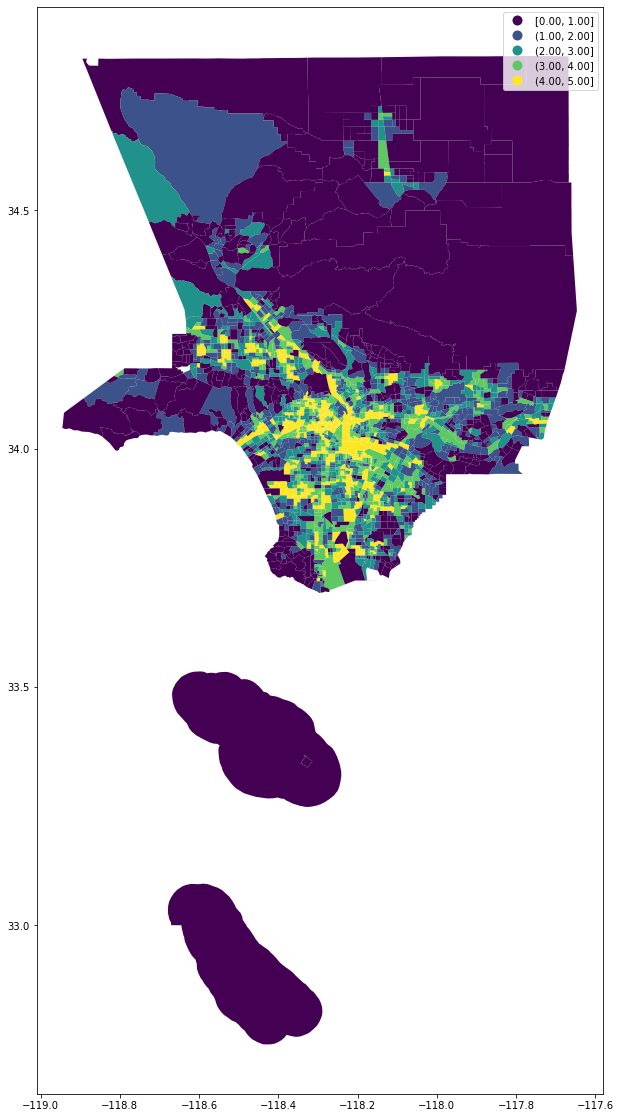

In [28]:
#equal intervalfor Proximity to Hazard Score -by standard deviation 
tracts_ejsm_sorted.plot(figsize=(24,20),
                 column='HazScore',
                 legend=True, 
                 scheme='equal_interval')

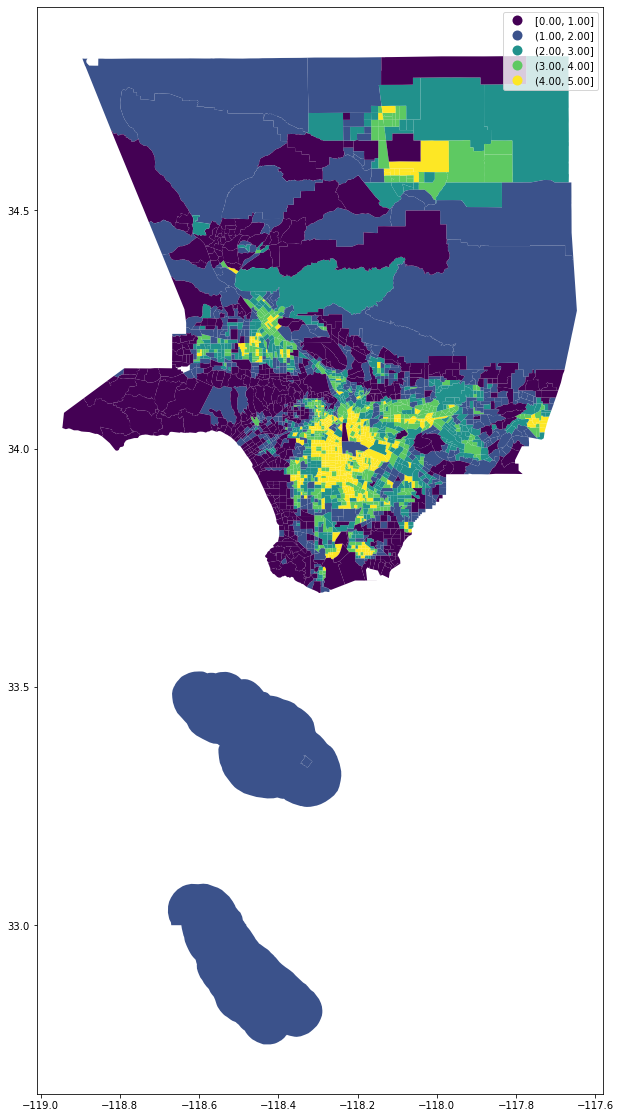

In [43]:
#equal intervalfor Social Vulnerability Score -by standard deviation 
tracts_ejsm_sorted.plot(figsize=(24,20),
                 column='SVscore',
                 legend=True, 
                 scheme='equal_interval')

In [30]:
import folium

In [61]:
# laid out the map for cumulative score. Could not continue due to memory passing threshold, but had added population and poverty data by census that we were unable to use at this point
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=tracts_ejsm, # geo data
                  data=tracts_ejsm, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'CIscore'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Degree of Cumulative Impact of Environmenta Hazards)').add_to(m)    # name on the legend color bar
m

In [32]:
# This project reflects the concentration of environmental hazards and vulnerability by census tract,
# reflecting across various index values, the concentration of environmental issues in South, Central, and East Los Angeles
#Danielle Hoague-figured out zero dilemma for data; ran spatial analysis and distribution of index by census tracts;  laid out markdown text and story 
#Andres Gonzalez-Merged and sorted data by FIPS; ran anaylsis for HazScore and SVscore; final map

In [33]:
import plotly.express as px
from sodapy import Socrata

In [34]:
client = Socrata("data.lacity.org", None)
results = client.get("amvf-fr72", limit=10000)
df =pd.DataFrame.from_records(results)

In [35]:
df.sample(5)

rpt_id report_type                arst_date  time area    area_desc  \
310     5958587     BOOKING  2020-06-22T00:00:00.000  0650   06    Hollywood   
108   200912469         RFC  2020-07-17T00:00:00.000  0930   09     Van Nuys   
4934    5962042     BOOKING  2020-06-27T00:00:00.000  1630   21      Topanga   
282     5926691     BOOKING  2020-05-05T00:00:00.000  1630   18    Southeast   
9159    6017763     BOOKING  2020-09-23T00:00:00.000  1340   12  77th Street   

        rd age sex_cd descent_cd  ... :@computed_region_k96s_3jcv  \
310   0676  28      M          W  ...                         440   
108   0905  30      M          H  ...                         218   
4934  2143  28      M          H  ...                         300   
282   1806  29      M          H  ...                         799   
9159  1213  29      M          B  ...                         743   

     :@computed_region_tatf_ua23                 bkg_date  \
310                          928  2020-06-22T00:00:00.000   
108                          263                      NaN   
4934                        1475  2020-06-27T00:00:00.000   
282                         1174  2020-05-05T00:00:00.000   
9159                        1051  2020-09-23T00:00:00.000   

     :@computed_region_ur2y_g4cx bkg_time :@computed_region_kqwf_mjcx  \
310                          NaN     0935                           8   
108                          NaN      NaN                           3   
4934                         NaN     2143                           2   
282                            7     1919                          13   
9159                           7     1619                          14   

           bgk_location :@computed_region_2dna_qi2s bkg_loc_cd  \
310           HOLLYWOOD                          57       4206   
108                 NaN                          18        NaN   
4934  VALLEY - JAIL DIV                          44       4279   
282             77TH ST                          45       4212   
9159            77TH ST                          35       4212   

                         dispo_desc  
310          FELONY COMPLAINT FILED  
108     MISDEMEANOR COMPLAINT FILED  
4934    MISDEMEANOR COMPLAINT FILED  
282   849(B)(1) PC/TECHNICAL ARREST  
9159    MISDEMEANOR COMPLAINT FILED  

[5 rows x 31 columns]

In [36]:
df.grp_description.unique()

array(['Robbery', nan, 'Liquor Laws', 'Aggravated Assault',
       'Prostitution/Allied', 'Narcotic Drug Laws',
       'Driving Under Influence', 'Gambling', 'Burglary', 'Drunkeness',
       'Vehicle Theft', 'Miscellaneous Other Violations',
       'Other Assaults', 'Against Family/Child', 'Fraud/Embezzlement',
       'Weapon (carry/poss)', 'Moving Traffic Violations',
       'Disorderly Conduct', 'Forgery/Counterfeit', 'Homicide',
       'Receive Stolen Property', 'Non-Criminal Detention', 'Larceny',
       'Rape', 'Sex (except rape/prst)', 'Disturbing the Peace',
       'Pre-Delinquency'], dtype=object)

In [37]:
arrest_by_charge = df.grp_description.value_counts().reset_index()
arrest_by_charge

index  grp_description
0               Aggravated Assault             1577
1   Miscellaneous Other Violations             1381
2          Driving Under Influence              996
3                   Other Assaults              909
4               Narcotic Drug Laws              860
5                    Vehicle Theft              678
6              Weapon (carry/poss)              518
7                         Burglary              448
8                          Robbery              327
9                          Larceny              255
10             Prostitution/Allied              243
11       Moving Traffic Violations              182
12                      Drunkeness              161
13                     Liquor Laws              145
14                        Gambling              106
15            Against Family/Child              106
16          Sex (except rape/prst)               90
17         Receive Stolen Property               82
18              Fraud/Embezzlement               60
19          Non-Criminal Detention               39
20                            Rape               38
21              Disorderly Conduct               37
22                        Homicide               33
23             Forgery/Counterfeit               30
24            Disturbing the Peace                6
25                 Pre-Delinquency                1

In [38]:
df.arst_typ_cd.unique()

array(['F', 'M', 'I', 'D', 'O'], dtype=object)

In [39]:
arrest_by_type = df.arst_typ_cd.value_counts().reset_index()
arrest_by_type

index  arst_typ_cd
0     F         5611
1     M         3704
2     I          519
3     O           84
4     D           82

In [40]:
crime = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

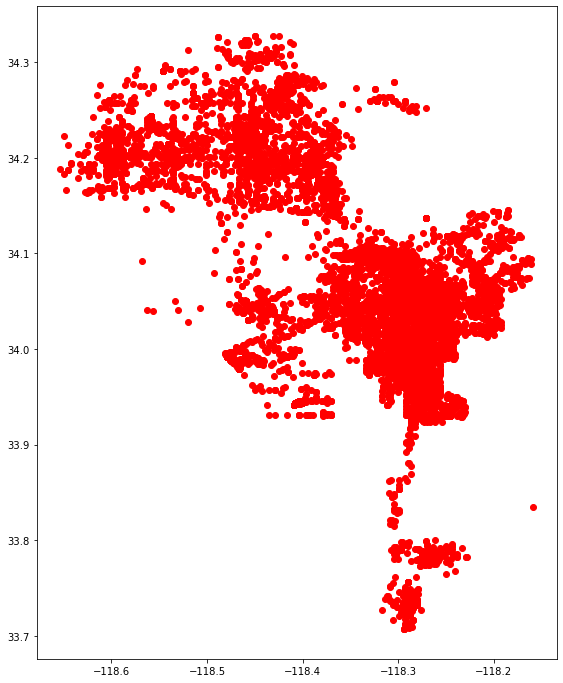

In [45]:
crime.plot(figsize=(12,12),color='red')

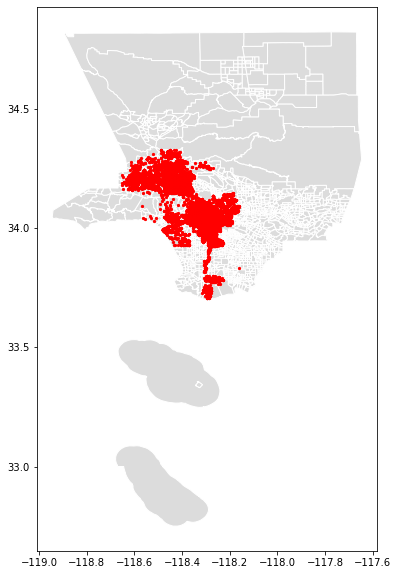

In [48]:
base = tracts_ejsm_sorted.plot(figsize=(12,10),color='gainsboro', edgecolor='white')

ax = crime.plot(ax=base, color='red', markersize=5)

In [49]:
crime.set_crs(epsg=4326, inplace=True)
crime.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
tracts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [51]:
join = gpd.sjoin(tracts,
                 crime,
                 how='right')

In [52]:
join.head()

index_left         FIPS   rpt_id report_type                arst_date  \
9361         0.0  06037101110  6005984     BOOKING  2020-09-04T00:00:00.000   
9593         0.0  06037101110  6009503     BOOKING  2020-09-10T00:00:00.000   
9504         0.0  06037101110  5993355     BOOKING  2020-08-16T00:00:00.000   
1140         0.0  06037101110  5960579     BOOKING  2020-06-25T00:00:00.000   
2877         0.0  06037101110  5979399     BOOKING  2020-07-27T00:00:00.000   

      time area area_desc    rd age  ... :@computed_region_tatf_ua23  \
9361  2250   16  Foothill  1656  24  ...                         260   
9593  1030   16  Foothill  1638  39  ...                        1270   
9504  2220   16  Foothill  1638  20  ...                        1270   
1140  1200   16  Foothill  1638  28  ...                        1270   
2877  0130   16  Foothill  1638  44  ...                        1270   

                     bkg_date :@computed_region_ur2y_g4cx bkg_time  \
9361  2020-09-05T00:00:00.000                          18     0218   
9593  2020-09-10T00:00:00.000                         NaN     1410   
9504  2020-08-17T00:00:00.000                         NaN     0201   
1140  2020-06-25T00:00:00.000                         NaN     1440   
2877  2020-07-27T00:00:00.000                         NaN     0311   

     :@computed_region_kqwf_mjcx       bgk_location  \
9361                           1  VALLEY - JAIL DIV   
9593                           1  VALLEY - JAIL DIV   
9504                           1  VALLEY - JAIL DIV   
1140                           1  VALLEY - JAIL DIV   
2877                           1  VALLEY - JAIL DIV   

     :@computed_region_2dna_qi2s bkg_loc_cd                     dispo_desc  \
9361                           7       4279    MISDEMEANOR COMPLAINT FILED   
9593                           7       4279    MISDEMEANOR COMPLAINT FILED   
9504                           7       4279       DISTRICT ATTORNEY REJECT   
1140                           7       4279  849(B)(1) PC/TECHNICAL ARREST   
2877                           7       4279    MISDEMEANOR COMPLAINT FILED   

                         geometry  
9361  POINT (-118.30020 34.25670)  
9593  POINT (-118.29320 34.25780)  
9504  POINT (-118.29300 34.25950)  
1140  POINT (-118.29300 34.25950)  
2877  POINT (-118.29300 34.25950)  

[5 rows x 34 columns]

In [54]:
crime_by_tracts = join.FIPS.value_counts().rename_axis('Tract').reset_index(name='crime_count')

In [55]:
crime_by_tracts.head()

Tract  crime_count
0  06037980028          235
1  06037273402          130
2  06037206300          112
3  06037237600           99
4  06037190700           86

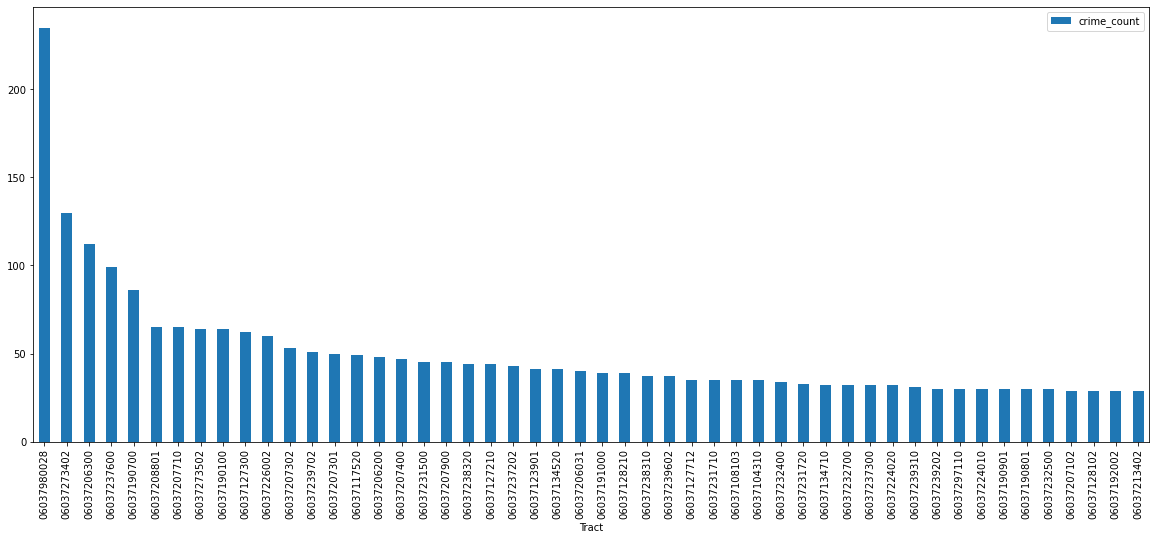

In [58]:
crime_by_tracts[:50].plot.bar(figsize=(20,8),x='Tract',y='crime_count')

In [ ]:
where = "grp_description IN ('Aggravated Assault', 'crime_type2'...)"

In [64]:
# Homicide 
HeatMap(list(https://data.lacity.org/resource/amvf-fr72.json?grp_description=Aggravated Assault).add_to(folium.FeatureGroup(name='Aggravated Assault').add_to(m))



SyntaxError: invalid syntax (<ipython-input-64-dc939adcbdc2>, line 2)

In [ ]:
# Robbery

HeatMap(list(zip(crime_robbery.LATITUDE.values, crime_robbery.LONGITUDE.values))).add_to(folium.FeatureGroup(name='Robbery').add_to(m))

# Assault

HeatMap(list(zip(crime_assault.LATITUDE.values, crime_assault.LONGITUDE.values))).add_to(folium.FeatureGroup(name='Assault').add_to(m))

folium.LayerControl(collapsed=False).add_to(m)

folium.GeoJson(dc_shape).add_to(m)

grp_description IN ('crime_type1', 'crime_type2'...)

where = "grp_description IN ('crime_type1', 'crime_type2'...)"
